In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("Admission_Predict.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


Preprocessing

In [5]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
data.drop('Serial No.',axis=1,inplace =True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x244f8f96550>,
 'caps': [<matplotlib.lines.Line2D at 0x244f8f96bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x244f8f96100>],
 'medians': [<matplotlib.lines.Line2D at 0x244f8fa3310>],
 'fliers': [<matplotlib.lines.Line2D at 0x244f8fa36a0>],
 'means': []}

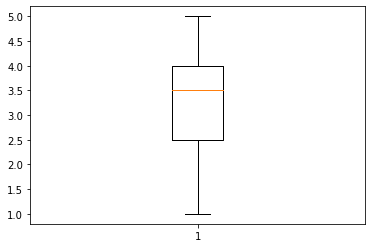

In [9]:
plt.boxplot(data['SOP'])

{'whiskers': [<matplotlib.lines.Line2D at 0x244f9078fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x244f9089670>,
 'boxes': [<matplotlib.lines.Line2D at 0x244f9078c40>],
 'medians': [<matplotlib.lines.Line2D at 0x244f9089ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x244f9095070>],
 'means': []}

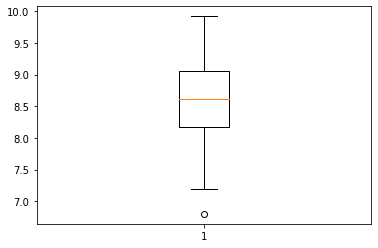

In [10]:
plt.boxplot(data['CGPA'])

{'whiskers': [<matplotlib.lines.Line2D at 0x244f90f45e0>,
 'caps': [<matplotlib.lines.Line2D at 0x244f90f4d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x244f90f4220>],
 'medians': [<matplotlib.lines.Line2D at 0x244f9101460>],
 'fliers': [<matplotlib.lines.Line2D at 0x244f91017f0>],
 'means': []}

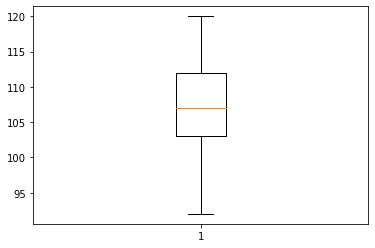

In [11]:
plt.boxplot(data['TOEFL Score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x244f9173730>,
 'caps': [<matplotlib.lines.Line2D at 0x244f9173e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x244f91733a0>],
 'medians': [<matplotlib.lines.Line2D at 0x244f917d5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x244f917d940>],
 'means': []}

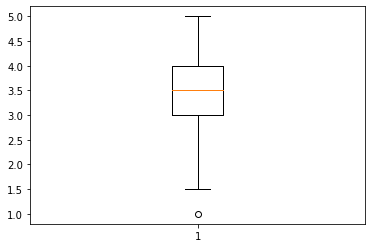

In [14]:
plt.boxplot(data['LOR '])

### Correlation

In [12]:
correlation = data.corr()
correlation

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

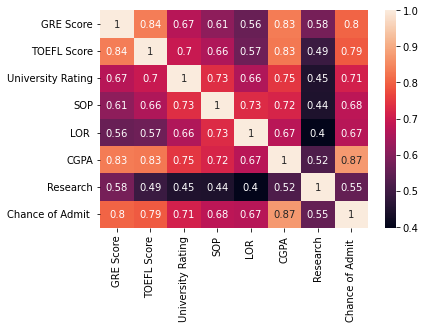

In [15]:
sns.heatmap(correlation, annot =True)

#### Sample scatter plot showing relation between CGPA and chance of Admit

Text(0, 0.5, 'chance')

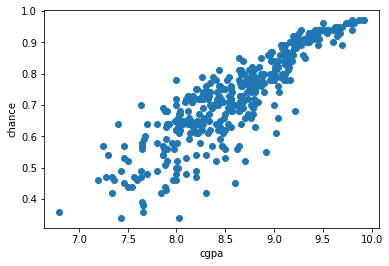

In [18]:
plt.scatter(data['CGPA'],data['Chance of Admit '])
plt.xlabel('cgpa')
plt.ylabel('chance')


Text(0, 0.5, 'Chance of Admit')

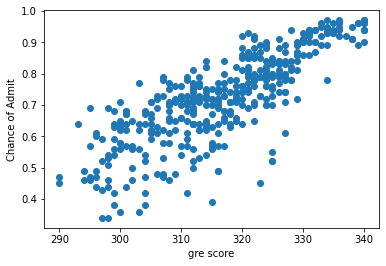

In [20]:
plt.scatter(data['GRE Score'],data['Chance of Admit '])
plt.xlabel('gre score')
plt.ylabel('Chance of Admit')

Text(0, 0.5, 'Chance of Admit')

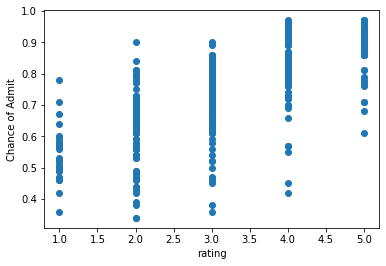

In [21]:
plt.scatter(data['University Rating'],data['Chance of Admit '])
plt.xlabel('rating')
plt.ylabel('Chance of Admit')

### model creation and training

In [22]:
x = data.drop('Chance of Admit ',axis =1)
y =data['Chance of Admit ']

In [23]:
x #separate target from featuers

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [24]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [29]:
x_train.shape ,x_test.shape

((320, 7), (80, 7))

In [30]:
model = LinearRegression()
model.fit(x_train , y_train) #training the model

LinearRegression()

In [31]:
model.coef_  

array([ 0.00155593,  0.00345886,  0.0051609 , -0.0052718 ,  0.02583621,
        0.11893147,  0.02345108])

In [32]:
model.intercept_

-1.2651534899104264

##### Model performance - checking for underfitting and overfitting

In [33]:
#testing score
model.score(x_test,y_test)

0.8087648849168175

In [34]:
#training score
model.score(x_train,y_train)

0.8017537738664476

In [35]:
y_pred = model.predict(x_test)

In [36]:
pd.DataFrame({'True values':y_test, 'Predicted values':y_pred})

,True values,Predicted values
280,0.68,0.717669
387,0.53,0.629248
313,0.67,0.579817
1,0.76,0.803259
35,0.88,0.859467
...,...,...
149,0.79,0.660585
301,0.66,0.721237
78,0.44,0.490368
71,0.96,0.957881


In [37]:
#errors
mean_absolute_error(y_test,y_pred)

0.04351086487152499

In [38]:
mean_squared_error(y_test,y_pred)

0.0029949779580478184

#### Prediction

In [39]:
model.predict([[300,120,4.5,4,4,9,1]])

array([0.81600561])

In [40]:
model.predict([[270,20,4.5,4,4,9,1]])

array([0.42344201])

#### Saving the model

In [41]:
import joblib

In [42]:
joblib.dump(model,'lr_model')

['lr_model']

In [43]:
model_reloaded = joblib.load('lr_model')

In [45]:
model_reloaded.predict([[300,120,4.5,4,4,9,1]]) #saving the model

array([0.81600561])